Taking instructions from the example found on http://darribas.org/gds15/labs/Lab_08.html, re: http://darribas.org/gds_scipy16/ipynb_md/07_spatial_clustering.html.

First I'll start by reading in the data. I think I'll just look at Chicago to begin with:

In [1]:
# importing recommended libraries

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale

sns.set(style="whitegrid")


/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [10]:
chi_inc_geojson = '/Users/fionaedwardson/Documents/GitHub/GISIII_Final_Project/city_income_data/inc_data_geojson/chi/chi_inc.geojson'

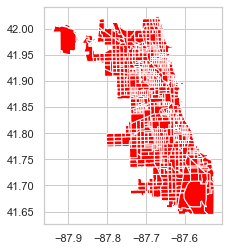

In [12]:
chi_inc = gpd.read_file(chi_inc_geojson)
chi_inc.plot(color='red')

Nice! The CRS looks good too.

Now, let's follow the recommendation of the lab and plot the data as a univariate map.

First I'll look at the data...

In [13]:
print(chi_inc)

     med_earn city_name                                           geometry
0     32321.0       chi  POLYGON ((-87.62433 41.74365, -87.62417 41.736...
1     34671.0       chi  POLYGON ((-87.59062 41.72952, -87.58871 41.726...
2     54606.0       chi  POLYGON ((-87.64060 41.95364, -87.64074 41.953...
3     62745.0       chi  POLYGON ((-87.64180 41.93498, -87.64139 41.934...
4     25571.0       chi  POLYGON ((-87.72286 41.78230, -87.72276 41.778...
..        ...       ...                                                ...
865   31359.0       chi  POLYGON ((-87.67790 41.74288, -87.67725 41.741...
866   50885.0       chi  POLYGON ((-87.80122 41.78476, -87.80122 41.784...
867   35464.0       chi  MULTIPOLYGON (((-87.68070 41.67726, -87.68070 ...
868   54734.0       chi  POLYGON ((-87.78201 41.79967, -87.78203 41.799...
869   43214.0       chi  POLYGON ((-87.77823 41.96853, -87.77283 41.968...

[870 rows x 3 columns]


Working off of a tutorial from here

In [15]:
# need to install another package
pip install descartes

SyntaxError: invalid syntax (<ipython-input-15-7c32cda57e1b>, line 2)

In [16]:
pip install -U descartes

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Create figure and axes (this time it's 9, arranged 3 by 3)
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(ratings):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    abb.plot(column=col, axes=ax, scheme='Quantiles', linewidth=0, colormap='Blues')
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()